In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc # rc == run configure(configuration file)
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
mushroom = pd.DataFrame(pd.read_csv('./data/mushrooms.csv'))
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


널값확인

In [4]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

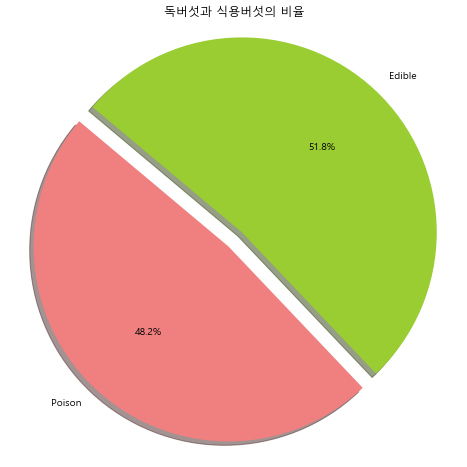

In [5]:
po_ed_num = mushroom['class'].value_counts()

plt.figure(figsize=(8,8))

labels = 'Poison', 'Edible'
sizes = [po_ed_num[1], po_ed_num[0]]
colors = ['lightcoral', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('독버섯과 식용버섯의 비율')

plt.axis('equal')
plt.show()

식용과 독버섯은 거의 반반이다.

In [6]:
print("버섯 주름이 어떻게 붙어 있는가? ( f: free, a: attached )")
print(mushroom['gill-attachment'].value_counts())
print("\n버섯 주름이 얼마나 떨어져 있는가? ( c: close, w: crowded )")
print(mushroom['gill-spacing'].value_counts())
print("\n각 버섯 주름의 너비가 어떤가? ( b: broad, n: narrow )")
print(mushroom['gill-size'].value_counts())
print("\n각 버섯 주름의 색상이 어떤가? \n( black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y )\n")
print(mushroom['gill-color'].value_counts())

버섯 주름이 어떻게 붙어 있는가? ( f: free, a: attached )
f    7914
a     210
Name: gill-attachment, dtype: int64

버섯 주름이 얼마나 떨어져 있는가? ( c: close, w: crowded )
c    6812
w    1312
Name: gill-spacing, dtype: int64

각 버섯 주름의 너비가 어떤가? ( b: broad, n: narrow )
b    5612
n    2512
Name: gill-size, dtype: int64

각 버섯 주름의 색상이 어떤가? 
( black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y )

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64


그래프로 시각화를 해보자

Text(0.5, 1.0, '\n주름 간격별 독버섯 여부\n')

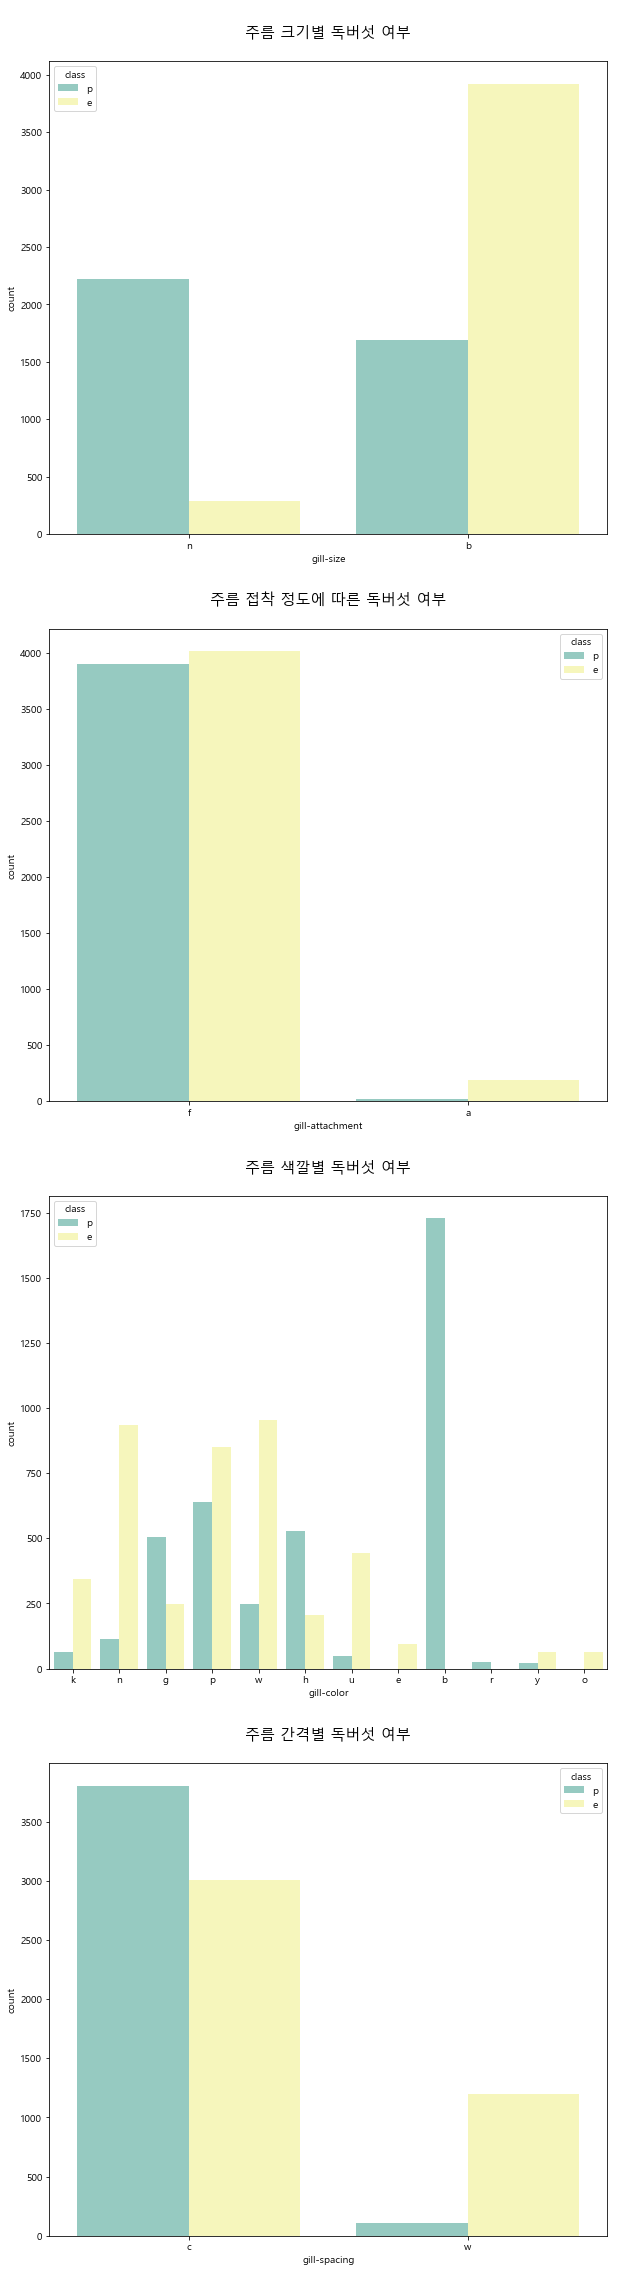

In [7]:
fig = plt.figure(figsize=(10, 40))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)


size = sns.countplot(x='gill-size', hue='class', data=mushroom, palette='Set3', ax=ax1)
size.set_title("\n주름 크기별 독버섯 여부\n", fontsize=15)

atta = sns.countplot(x='gill-attachment', hue='class', data=mushroom, palette='Set3', ax=ax2)
atta.set_title("\n주름 접착 정도에 따른 독버섯 여부\n", fontsize=15)

color = sns.countplot(x='gill-color', hue='class', data=mushroom, palette='Set3', ax=ax3)
color.set_title("\n주름 색깔별 독버섯 여부\n", fontsize=15)

space = sns.countplot(x='gill-spacing', hue='class', data=mushroom, palette='Set3', ax=ax4)
space.set_title("\n주름 간격별 독버섯 여부\n", fontsize=15)


주름 색깔별 독버섯 여부

- 검은 버섯은 먹으면 그냥 간다고 봐도 무방하다. 갈색과 하얀색은 식용버섯일 확률이 높다. 그리고 반전으로 보라색 주름의 경우 대체적으로 식용버섯이다!

주름 너비별(크기) 독버섯 여부

- 주름의 너비가 넓으면 거의 식용이고, 좁으면 높은 확률로 독버섯이다!

주름 접착 정도의 여부

- 기둥에 주름이 붙어있으면 거의 식용버섯이다

주름 간격별 독버섯 여부

- 간격이 좁고 촘촘할 경우 식용버섯일 확률이 높다.

숫자화

In [8]:
del mushroom['veil-type']
del mushroom['stalk-root']

In [9]:
class_mapping = {"p":0, "e":1}
mushroom['class'] = mushroom['class'].map(class_mapping)
cap_shape = {"b":0, "c":1, "x":2, "f":3, "k":4, "s":5  }
mushroom['cap-shape'] = mushroom['cap-shape'].map(cap_shape)
cap_surface = {"f":0, "g":1, "y":2, "s":3}
mushroom['cap-surface'] = mushroom['cap-surface'].map(cap_surface)
cap_color = {"n":0, "b":1, "c":2, "g":3, "r":4, "p":5, "u":6, "e":7, "w":8, "y":9}
mushroom['cap-color'] = mushroom['cap-color'].map(cap_color)
bruises = {"t":0, "f":1}
mushroom['bruises'] = mushroom['bruises'].map(bruises)
odor = {"a":0, "l":1, "c":2, "y":3, "f":4, "m":5, "n":6, "p":7, "s":8}
mushroom['odor'] = mushroom['odor'].map(odor)
stalk_shape = {"t":0, "e":1}
mushroom['stalk-shape'] = mushroom['stalk-shape'].map(stalk_shape)
stalk_surface_above_ring = {"f":0, "y":1, "k":2, "s":3}
mushroom['stalk-surface-above-ring'] = mushroom['stalk-surface-above-ring'].map(stalk_surface_above_ring)
stalk_surface_below_ring = {"f":0, "y":1, "k":2, "s":3}
mushroom['stalk-surface-below-ring'] = mushroom['stalk-surface-below-ring'].map(stalk_surface_below_ring)
stalk_color_above_ring = {"n":0, "b":1, "c":2, "g":3, "o":4, "p":5, "e":6, "w":7, "y":8}
mushroom['stalk-color-above-ring'] = mushroom['stalk-color-above-ring'].map(stalk_color_above_ring)
stalk_color_below_ring = {"n":0, "b":1, "c":2, "g":3, "o":4, "p":5, "e":6, "w":7, "y":8}
mushroom['stalk-color-below-ring'] = mushroom['stalk-color-below-ring'].map(stalk_color_below_ring)

gattach_mapping = {"a": 0 , "d":1, "f":2, "n":3}
gspacing_mapping = {"c": 0 , "w":1, "d":2}
gsize_mapping = {"b": 0 , "n":1} 
gcolor_mapping = {"k": 0 , "n":1, "b":2, "h":3, "g":4, "r":5, "o":6, "p":7, "u":8, "e":9, "w":10, "y":11} 

mushroom['gill-attachment'] = mushroom['gill-attachment'].map(gattach_mapping)
mushroom['gill-spacing'] = mushroom['gill-spacing'].map(gspacing_mapping)
mushroom['gill-size'] = mushroom['gill-size'].map(gsize_mapping)
mushroom['gill-color'] = mushroom['gill-color'].map(gcolor_mapping)

mushroom['veil-color'].replace({'w':0,'n':1, 'o':2,'y':3}, inplace = True)
mushroom['ring-number'].replace({'o':0, 't':1, 'n':0}, inplace = True)
mushroom['ring-type'].replace({'p':0,'e':1, 'l':0, 'f':2, 'n':3}, inplace = True)
mushroom['spore-print-color'].replace({'w':0,'n':1, 'k':2,'h':3, 'r':4,'y':5,'u':6,'o':7,'b':8}, inplace = True)
mushroom['population'].replace({'v':0,'y':1, 's':2,'n':3, 'a':4,'c':5}, inplace = True)
mushroom['habitat'].replace({'d':0,'g':1, 'p':2,'l':3, 'u':4,'m':5,'w':6}, inplace = True)

In [10]:
# for i in mushroom.columns:
#     print(mushroom[i].value_counts())

차원축소

In [34]:
mushroom_x = mushroom.iloc[:,1:].values
mushroom_y = mushroom[['class']].values

In [35]:
from sklearn import decomposition
from sklearn import datasets

model = decomposition.PCA(n_components=0.95)
model.fit(mushroom_x)

mushroom_pca_input = model.transform(mushroom_x)
model.explained_variance_ratio_

np.argmax(np.cumsum(model.explained_variance_ratio_) >= 0.95 ) + 1

10

In [36]:
#mushroom_x = mushroom_pca_input

## 머신러닝

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import ensemble

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category='Logging before flag parsing goes to stderr')

데이터 나누기

In [38]:
x_train, x_test, y_train, y_test = train_test_split(mushroom_x, mushroom_y, test_size=0.2)

디시젼트리

In [16]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.9778461538461538


랜덤포레스트

In [17]:
classifier = RandomForestClassifier(n_estimators=50, criterion='entropy')

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.9981538461538462


그래디언트 부스팅

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0, learning_rate= 0.01)

gbc.fit(x_train, y_train)

print(gbc.score(x_test, y_test))

0.9101538461538462


로지스틱 리그레션

In [19]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

y_pred = logistic.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.8510769230769231


## 딥러닝

In [58]:
lr = 1e-2
epochs = 1001

In [47]:
inode = 20
h1node = 16
h2node = 32
onode = 1

In [48]:
X = tf.placeholder(tf.float32, [None, inode])
T = tf.placeholder(tf.float32, [None, onode])

In [54]:
W2 = tf.get_variable("W24", shape = [inode, h1node], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([h1node]))
Z2 = tf.matmul(X, W2) + b2
A2 = tf.sigmoid(Z2)

W3 = tf.get_variable("W34", shape = [h1node, h2node], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([h2node]))
Z3 = tf.matmul(A2, W3)+ b3
A3 = tf.sigmoid(Z3)

W4 = tf.get_variable("W44", shape = [h2node, onode], initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([onode]))
Z4 = tf.matmul(A3, W4) + b4
A4 = tf.sigmoid(Z4)

In [55]:
loss = -tf.reduce_mean(T * tf.log(A4) + (1-T) * tf.log(1-A4))
train = tf.train.AdamOptimizer(lr).minimize(loss)

In [56]:
predicted = tf.cast(A4 > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [59]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(epochs):
        
        loss_val, _ = sess.run([loss, train], feed_dict = {X: x_train, T:y_train})
    
        if step % 100 == 0:
            acc = sess.run(accuracy, feed_dict={X:x_test,T:y_test})
            print('step = ', step, ", loss = ", loss_val, ", test loss = ", acc)
            
            
    acc = sess.run(accuracy, feed_dict={X:x_test,T:y_test})
    print("\nAccuracy = ", acc)

step =  0 , loss =  0.77191556 , test loss =  0.47876924
step =  100 , loss =  0.09025658 , test loss =  0.9796923
step =  200 , loss =  0.004687096 , test loss =  1.0
step =  300 , loss =  0.0015582986 , test loss =  1.0
step =  400 , loss =  0.00083511305 , test loss =  1.0
step =  500 , loss =  0.00053160393 , test loss =  1.0
step =  600 , loss =  0.0003718044 , test loss =  1.0
step =  700 , loss =  0.00027618522 , test loss =  1.0
step =  800 , loss =  0.00021397123 , test loss =  1.0
step =  900 , loss =  0.00017100056 , test loss =  1.0
step =  1000 , loss =  0.00013994909 , test loss =  1.0

Accuracy =  1.0
